In [2]:
#Importing Libaries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [4]:
#Filter for data analyst jobs in US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

#Drop NaN values form the column for plotting
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

#get a sampple
df_DA_US["salary_year_avg"].sample(10)

548328    174000.0
5167      186500.0
758191    105000.0
481954     77446.0
316533     51500.0
216966     80000.0
503345     80500.0
411918     77500.0
93147      52000.0
390360     94500.0
Name: salary_year_avg, dtype: float64

<Axes: >

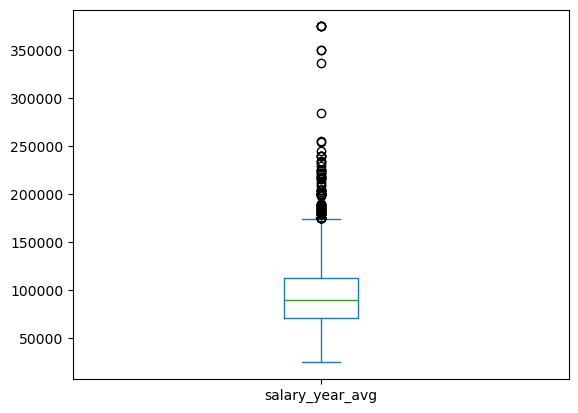

In [5]:
df_DA_US["salary_year_avg"].plot(kind="box")

{'whiskers': [<matplotlib.lines.Line2D at 0x20188a97790>,
 'caps': [<matplotlib.lines.Line2D at 0x20188aac990>,
 'boxes': [<matplotlib.lines.Line2D at 0x20188a96e50>],
 'medians': [<matplotlib.lines.Line2D at 0x20188aadd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20188aae5d0>],
 'means': []}

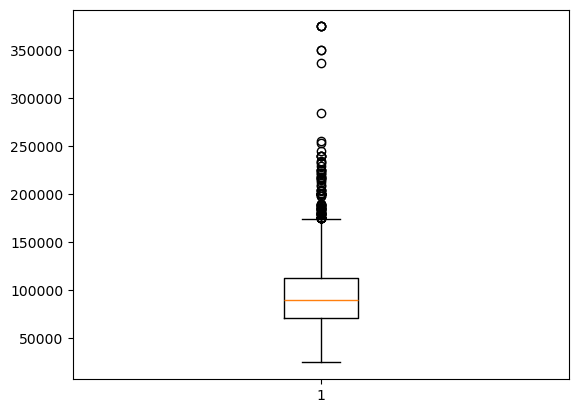

In [6]:
#alternative
plt.boxplot(df_DA_US["salary_year_avg"])

Text(0, 0.5, 'salary_year_avg')

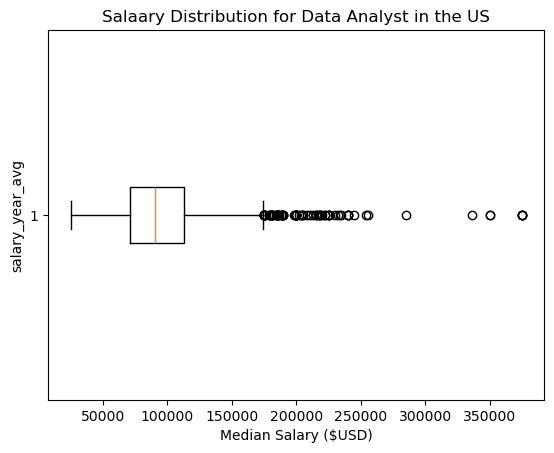

In [9]:
#flipps the orientation
plt.boxplot(df_DA_US["salary_year_avg"],vert=False)
plt.title("Salaary Distribution for Data Analyst in the US")
plt.xlabel("Median Salary ($USD)")
plt.ylabel("salary_year_avg")

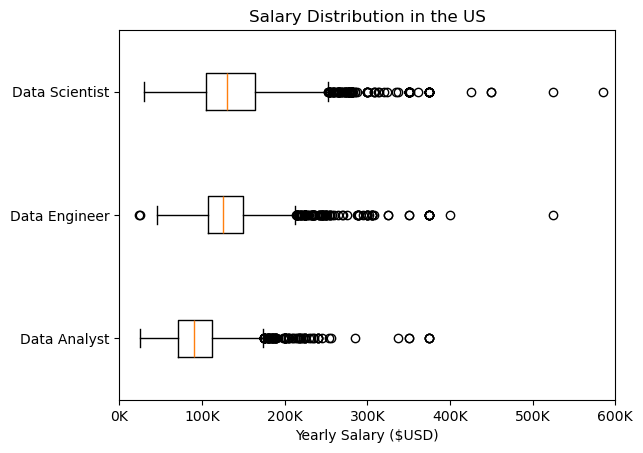

In [30]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

#filter the data to appropriate job_titles
#only get data analyst jobs
df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the US")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y/1000)}K"))
plt.xlim(0,600000)
plt.show()

In [23]:
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]